# Crawling Data

## Tentang Crawling Data

Crawling.avif <br>
Crawling data merupakan Proses untuk mengotomatisasi untuk menjelajahi sebuah situs web untuk mengumpulkan informasi dari halaman-halaman web. proses ini oleh komputer dikenal dengan istilah *Web Crawler*. Web crawler akan memulai dengan mengunjungi sebuah halaman web, mengekstrak semua tautan di halaman tersebut, kemudian mengikuti tautan tersebut untuk mengunjungi halaman-halaman lain dan mengumpulkan data yang diperlukan.
1. **Tools Yang Biasa Digunakan :** <br>
* Web Spider
* Spider Bot
* Web Bot
* Crawler

2. **Tujuan dan Fungsi Crawling Data** <br>
* Pengindeksan oleh *Search Engine* : <br>
  *Search Engine* seperti Google menggunakan web crawler untuk mengindeks konten dari miliaran halaman web. Data yang dikumpulkan kemudian digunakan untuk membuat indeks untuk pengguna menemukan informasi secara cepat dan tepat melalui pencarian.
* Pemantauan Situs Web: <br>
  Web crawling juga digunakan untuk pemantauan perubahan pada situs web.
* Web Scrapping : <br>
  Web crawling sering digunakan sebagai langkah awal dalam proses web scraping. Crawling digunakan untuk mengunjungi halaman pada suatu situs web dan Scraping digunakan untuk mengekstrak informasi dari halaman-halaman tersebut.

3. **Cara Melakukan Crawling Data** <br>
Langkah-langkah untuk melakukan data crawling adalah sebagai berikut:

* mengidentifikasi sumber data: Tentukan sumber data yang akan dikumpulkan seperti situs web, database, atau dokumen.
* Membuat crawler: Buat atau gunakan software atau aplikasi khusus yang disebut "crawler" untuk mengakses dan mengumpulkan data dari sumber.
* Mengkonfigurasikan crawler: Atur konfigurasi crawler seperti jumlah halaman yang dikumpulkan, interval waktu antar crawling, dan lain-lain.
Jalankan crawler: Jalankan crawler untuk mengakses sumber data dan mengumpulkan data yang dibutuhkan.
* Menganalisis data: Analisis data yang dikumpulkan untuk memastikan bahwa data akurat dan sesuai dengan kebutuhan.
* Menyimpan data: Simpan data yang dikumpulkan ke dalam database atau dokumen yang sesuai.
* Memantau: Pantau dan perbarui crawler secara berkala untuk memastikan bahwa data yang dikumpulkan akurat dan up-to-date.

## Kode Crawling Data

In [36]:
# Library yang akan digunakan
import scrapy
from scrapy.crawler import CrawlerProcess

class CrawlingWeb(scrapy.Spider): #1
    name = "Sindonews"
    custom_settings = {
        'FEEDS': {
            'sindonews.csv': {
                'format': 'csv',
                'overwrite': True,
            },
        },
    }

    def start_requests(self):
        urls = []
        # Sumber data
        base_url = "https://index.sindonews.com/index/0/"
        # jumlah data dan tanggal yang akan diambil
        for i in range(0, 100):
            url = f"{base_url}{i}?t=2024-09-02"
            urls.append(url)

        for url in urls:
            yield scrapy.Request(url=url, callback=self.parse)

    def parse(self, response):
        # mengambil data dari elemen div
        for data in response.css("div.indeks-news"):
          yield {
              # mengambil data yang diperlukan dari elemen div
              'Judul' : data.css('div.indeks-title > a::text').get(),
              "Isi Berita" : data.css('div.indeks-caption > span::text').get(),
              "Tanggal Berita" : data.css('div.mini-info > ul > li > p::text').get(),
              "Kategori" : data.css('div.mini-info > ul > li > a::text').get()
          }

process = CrawlerProcess()
process.crawl(CrawlingWeb)
process.start()

Sumber data diambil dari : <br>
https://www.sindonews.com/ <br>
pertama tama mengimpor library yang dibutuhkan, disini saya mengimport scrapy. scrapy sendiri merupakan sebuah framework untuk melakukan web scraping. <br>
link menuju scrappy <br>
https://docs.scrapy.org/en/latest/intro/tutorial.html <br>
**#1**. memebuat spider baru dengan nama CrawlingWeb yang interiche scrapi.spider dan membuat settings untuk file csv yang akan disimpan

## Hasil Crawling

In [24]:
import pandas as pd

# Membaca file CSV ke DataFrame
df = pd.read_csv('sindonews.csv')

# Menampilkan DataFrame
df

,Judul,Isi Berita,Tanggal Berita,Kategori
0,"Pembubaran Jiwasraya, Kementerian BUMN Bentuk ...",Wakil Menteri BUMN Kartika Wirjoatmodjo memast...,"Senin, 02 September 2024 - 23:30 WIB",EKONOMI BISNIS
1,6 Tersangka Pengeroyokan Tahanan Rutan Depok h...,"Kapolres Depok, Kombes Pol Arya Perdana mengat...","Senin, 02 September 2024 - 23:54 WIB",METRO
2,Tamara Tyasmara Disebut Bucin pada Yudha Arfan...,"Pengacara Yudha Arfandi (YA), Daliun Sailan, m...","Senin, 02 September 2024 - 23:00 WIB",LIFESTYLE
3,Mahindra Dorong Industri Otomotif India Lawan ...,Konglomerat India Mahindra Group berencana men...,"Senin, 02 September 2024 - 23:07 WIB",OTOMOTIF
4,Kementerian PUPR Sebut Capaian 10 Tahun Infras...,"Jubir Kementerian PUPR, Endra S Atmawidjaja me...","Senin, 02 September 2024 - 23:28 WIB",NASIONAL
...,...,...,...,...
95,Soal Pertunjukan Musik Dugem di Open House Raj...,Universitas Brawijaya (UB) menjadi sorotan usa...,"Senin, 02 September 2024 - 18:00 WIB",DAERAH
96,"46.000 Pekerja Diterjang Badai PHK, Korban Ter...",Kementerian Ketenagakerjaan (Kemnaker) melapor...,"Senin, 02 September 2024 - 17:46 WIB",EKONOMI BISNIS
97,Rusia Tegaskan Israel dan Ukraina Punya Agenda...,Ukraina dan Israel tengah berupaya memicu pera...,"Senin, 02 September 2024 - 17:45 WIB",INTERNATIONAL
98,3 Ayat Terakhir Surat Al Hasyr yang Punya Bany...,Tiga ayat terakhir Surat Al Hasyr rupanya memi...,"Senin, 02 September 2024 - 17:45 WIB",KALAM


diatas merupakan dataframe dari hasil web crawling yang telah dilakukan. didapatkan hasil sebanyak 100 data dengan 4 kolom yaitu : Judul Artikel, Tanggal Terbit, Kategori Artikel dan juga Link Artikel.

In [42]:
# jumlah kategori pencarian
kategori = df['Kategori'].unique()
len(kategori)

12

dari kode diatas diketahui jumlah jenis katori sebanyak 12 jenis yaitu METRO, NASIONAL, DAERAH, Dlsbnya.

In [29]:
# Menghitung jumlah kategori
kategori_counts = df['Kategori'].value_counts()

# Menampilkan hasil
kategori_counts

,count
Kategori,
METRO,17
NASIONAL,15
DAERAH,12
EKONOMI BISNIS,11
SPORTS,11
LIFESTYLE,10
OTOMOTIF,8
INTERNATIONAL,7
TEKNO,4


diatas merupakan dataframe dari jumlah data berdasarkan jenis kategori, diketahui jenis kategori METRO paling banyak yaitu sebanyak 17 artikel dan diketahui jenis kategori KALAM paling sedikit yaitu sebanyaj 1 artikel dari 100 artikel

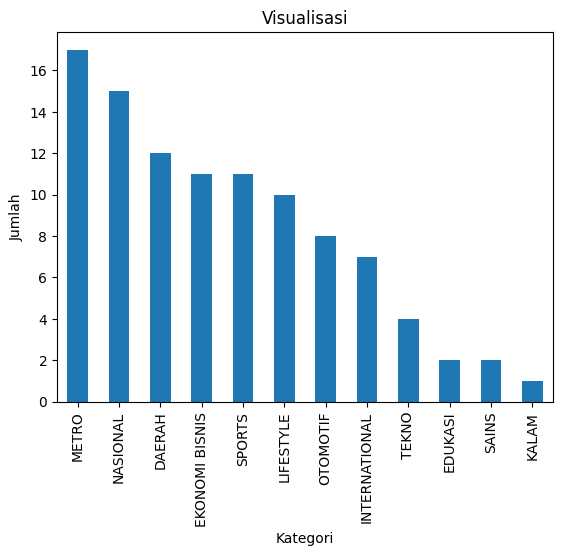

In [35]:
import matplotlib.pyplot as plt

# mebuat plot dan menghitung jumlah nilai dari kategori
df['Kategori'].value_counts().plot(kind='bar')
# memabuat xlabel
plt.xlabel('Kategori')
# memuat ylabel
plt.ylabel('Jumlah')
# membuat judul plot
plt.title('Visualisasi')
plt.show()